<a href="https://colab.research.google.com/github/PankajBGadge/The-Global-Terrorism-Database-Analysis/blob/main/Pankaj_B_GadgeGlobal_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b>Problem Statement: Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Import required Libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**
Large dataset not load directly and create error while running. In that case dataset run with help of encoding method.

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone project EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Data Inspection**

In [ ]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**As you see all the columns in the dataset are not recoverable so I used display max columns to identified **

In [ ]:
pd.set_option('display.max_columns', None)
dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

# **Rename the column of interest to proper understand**

In [ ]:
dataset.rename(columns = {'iyear':'Year','imonth':'Month',	'iday':'Day', 'country_txt':'Country', 'region_txt':'Region','provstate':'State',	'city':'City','latitude':'Latitude',	'longitude':'Longitude',	'attacktype1_txt':'Attack_Type', 'summary':'Summary', 'targtype1_txt':'Target', 'weaptype1_txt':'Weapon_type', 'nkill':'Kills',  'nwound':'Wound', 'success':'Success', 'motive':'Motive','gname':'Terrorist_Group'	}, inplace = True)

# **After data inspection we found that there are too many columns available so we only keep columns of our interest**

# **Variable Description**

'Year': Year of terrorist attacks,

'Month':Month of terrorist attacks

'Day':Date of month of terrorist attacks

'Country':Contry of terrorist attacks

'Region':Region of terrorist attacks

'State':State of terrorist attacks

'City': City of terrorist attacks

'Latitude':Latitude of terrorist attacks

'Longitude':Longitude of terrorist attacks

'Attack_Type':Type of terrorist attacks

'Summary':A brief statement or account of the main points of terrorist attacks.

'Target': A person, object, or place selected as the aim of an attack.

'Weapon_type':Weapon used in terrorist attacks

'Kills': Number of people killed in terrorist attacks

'Wound': Number of people wounded in terrorist attacks

'Motive': Motive of terrorist attacks

'Terrorist_Group': Name of terrorist group 


# **Use the only columns of interest**

In [ ]:
terrorist_data=dataset[['Year','Month','Day','Country','Region','State','City','Latitude','Longitude','Attack_Type','Summary','Target','Weapon_type','Kills','Wound','Success','Motive','Terrorist_Group']]

In [ ]:
terrorist_data.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Attack_Type,Summary,Target,Weapon_type,Kills,Wound,Success,Motive,Terrorist_Group
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,NaN,Private Citizens & Property,Unknown,1.0,0.0,1,NaN,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),NaN,Government (Diplomatic),Unknown,0.0,0.0,1,NaN,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,NaN,Journalists & Media,Unknown,1.0,0.0,1,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,Government (Diplomatic),Explosives,NaN,NaN,1,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,Government (Diplomatic),Incendiary,NaN,NaN,1,NaN,Unknown


In [ ]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   State            181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Attack_Type      181691 non-null  object 
 10  Summary          115562 non-null  object 
 11  Target           181691 non-null  object 
 12  Weapon_type      181691 non-null  object 
 13  Kills            171378 non-null  float64
 14  Wound            165380 non-null  float64
 15  Success          181691 non-null  int64  
 16  Motive           50561 non-null   obje

# **There is some null value present in our dataset like in latitude,longitude,summary and motive**
Use dropna to drop null value

In [ ]:
terrorist_data.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46721 entries, 5 to 181683
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46721 non-null  int64  
 1   Month            46721 non-null  int64  
 2   Day              46721 non-null  int64  
 3   Country          46721 non-null  object 
 4   Region           46721 non-null  object 
 5   State            46721 non-null  object 
 6   City             46721 non-null  object 
 7   Latitude         46721 non-null  float64
 8   Longitude        46721 non-null  float64
 9   Attack_Type      46721 non-null  object 
 10  Summary          46721 non-null  object 
 11  Target           46721 non-null  object 
 12  Weapon_type      46721 non-null  object 
 13  Kills            46721 non-null  float64
 14  Wound            46721 non-null  float64
 15  Success          46721 non-null  int64  
 16  Motive           46721 non-null  object 
 17  Terrorist_G

In [ ]:
terrorist_data.describe() 

,Year,Month,Day,Latitude,Longitude,Kills,Wound,Success
count,46721.000000,46721.000000,46721.000000,46721.000000,46721.000000,46721.000000,46721.000000,46721.000000
mean,2007.925922,6.486612,15.242439,26.645695,48.041418,2.420218,5.004067,0.913465
std,6.505264,3.381253,8.824372,14.023047,47.439199,13.151222,59.619901,0.281155
min,1970.000000,1.000000,0.000000,-42.250458,-157.858333,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,18.133562,35.008912,0.000000,0.000000,1.000000
50%,2009.000000,7.000000,15.000000,32.370010,45.166670,0.000000,0.000000,1.000000
75%,2011.000000,9.000000,23.000000,34.565494,75.522909,2.000000,3.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,179.366667,1384.000000,8191.000000,1.000000


# **EDA**

In [ ]:
numeric_features = terrorist_data.describe().columns
numeric_features

Index(['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Kills', 'Wound',
       'Success'],
      dtype='object')

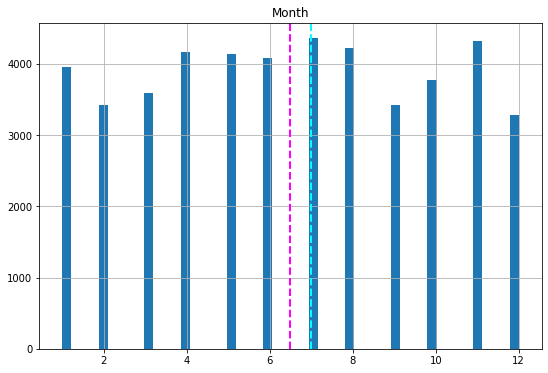

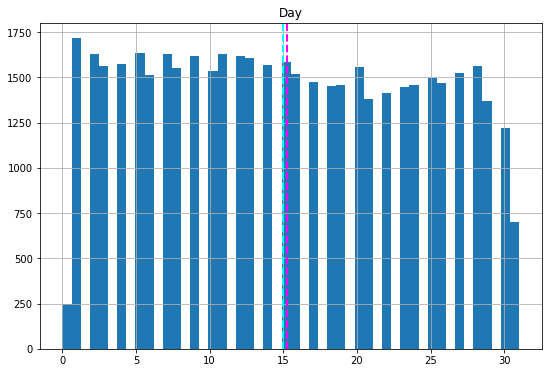

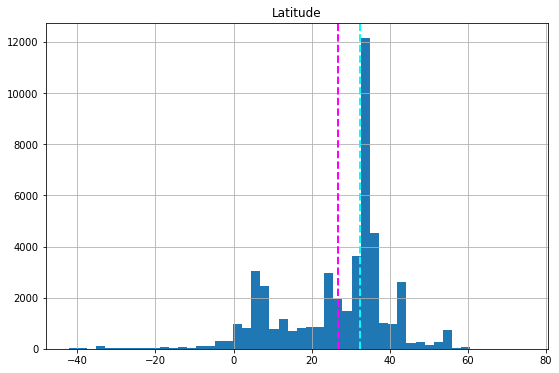

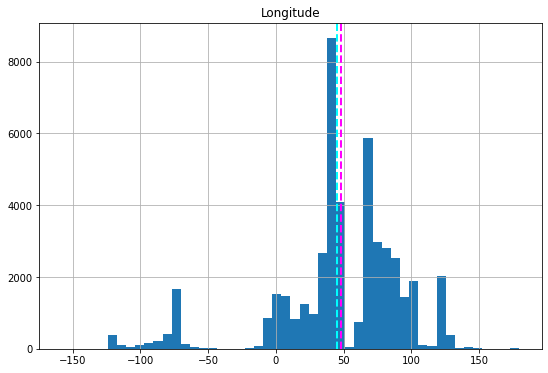

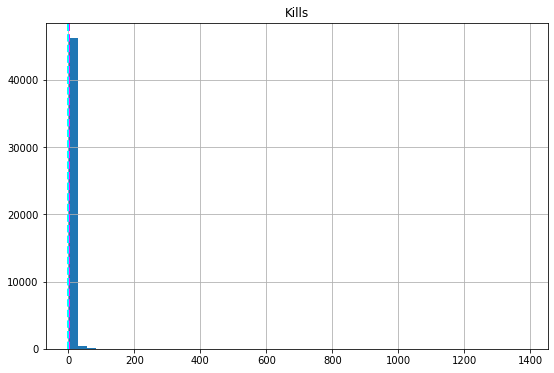

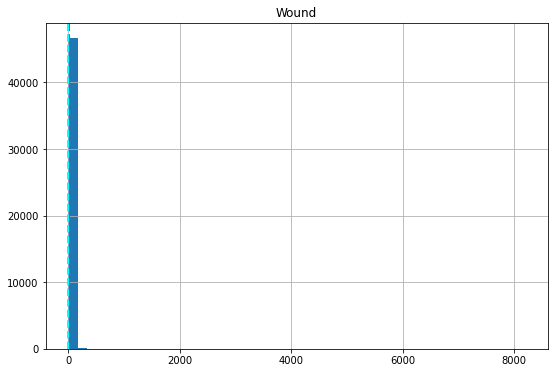

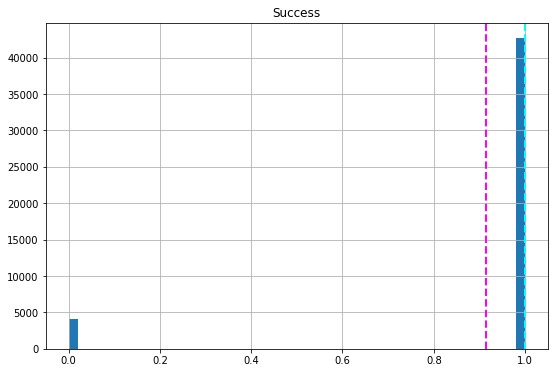

In [ ]:
 #plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = terrorist_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# This represents the distribution of numeric data on each series in the dataframe.

# **Correlation**

# Correlation heatmap shows how much related one parameter to other in the dataset.

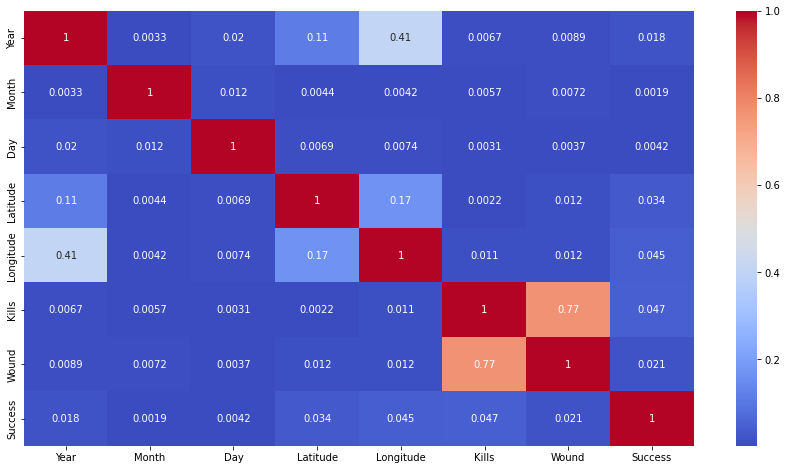

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = terrorist_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# The above correlation graph shows only two features wound and kills are just correlated but not highly correlated

# **Terrorist activities with years**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

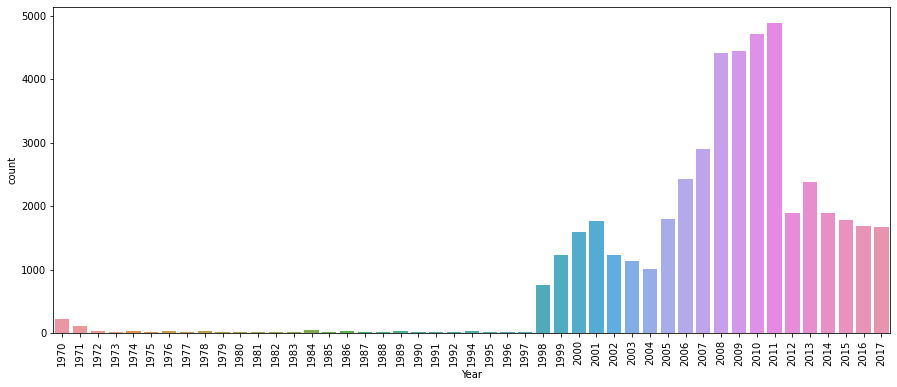

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Year'])
plt.xticks(rotation=90)

# Graph represents  since 2007 to 2011 has large number of terrorist activities.2011 most terrorist activities took place

# **Terrorist Group**

In [ ]:
terrorist_data['Terrorist_Group'].unique()

array(['Black Nationalists', "New Year's Gang", 'Left-Wing Militants',
       ..., 'Nepali Congress Party (NC)', 'Bedouin Israeli extremists',
       'Fatoni Warriors'], dtype=object)

In [ ]:

terrorist_data['Terrorist_Group'].value_counts().nlargest(20)

Unknown                                           23307
Taliban                                            1892
Communist Party of India - Maoist (CPI-Maoist)     1654
Revolutionary Armed Forces of Colombia (FARC)       845
New People's Army (NPA)                             806
Tehrik-i-Taliban Pakistan (TTP)                     798
Islamic State of Iraq and the Levant (ISIL)         784
Maoists                                             741
Al-Shabaab                                          642
Liberation Tigers of Tamil Eelam (LTTE)             621
Al-Qaida in Iraq                                    550
Boko Haram                                          383
Algerian Islamic Extremists                         358
Chechen Rebels                                      285
Kurdistan Workers' Party (PKK)                      279
Moro Islamic Liberation Front (MILF)                277
Al-Qaida in the Arabian Peninsula (AQAP)            267
Abu Sayyaf Group (ASG)                          

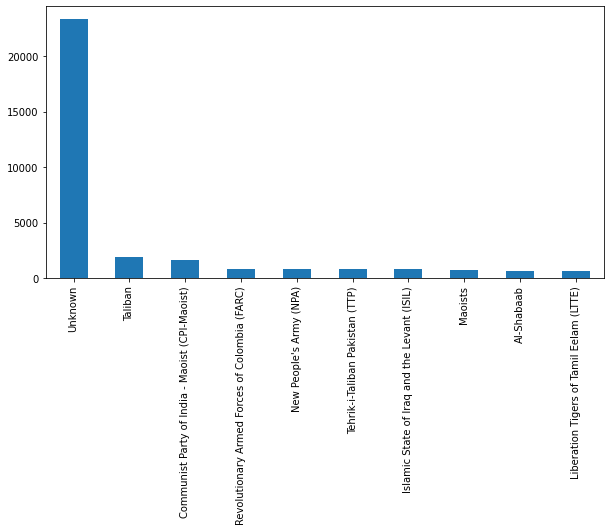

In [ ]:
terrorist_data['Terrorist_Group'].value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.show()

# Graph shows that there was unknown groups that take part in most of the terrorist activities. While Taliban  is the biggest Terrorist Group which take parts in most of the  terrorist activities.

# **Terrorist attacks type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

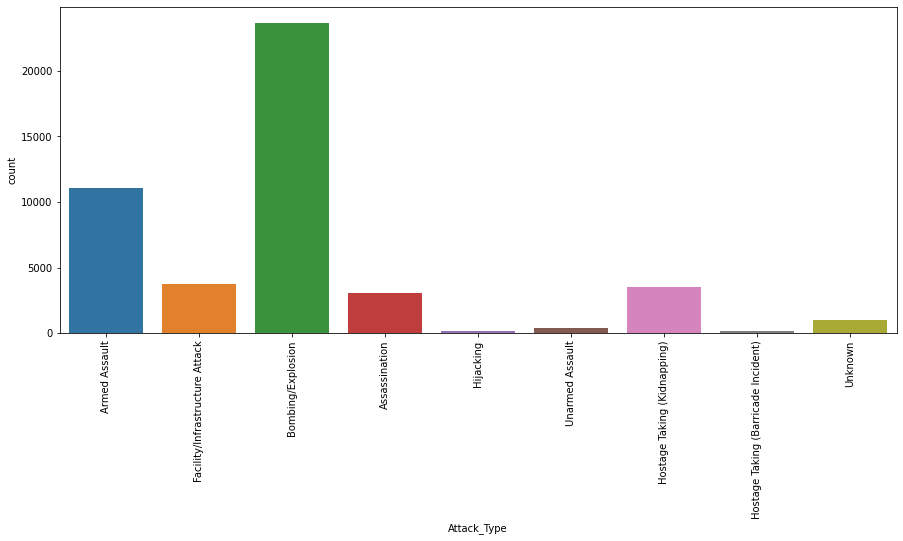

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Attack_Type'])
plt.xticks(rotation=90)

# Since from the above chart it is clear that Bombing/Explosion method was mostly used.

# **Terrorist Weapon type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

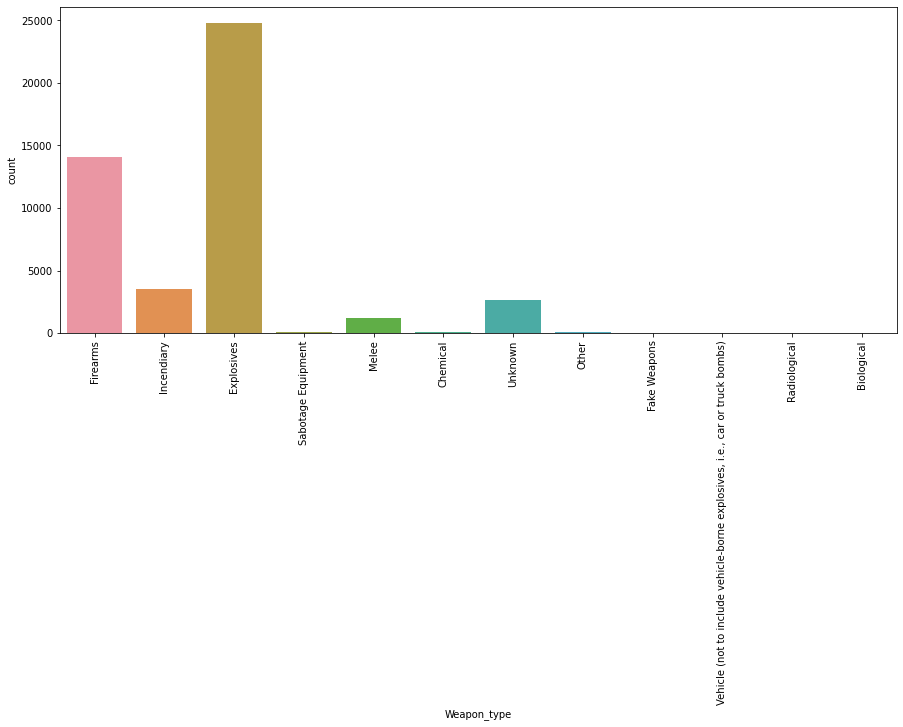

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Weapon_type'])
plt.xticks(rotation=90)

# From the above chart it is clear that Explosive was mostly used for terrorist attacks

# **Target selected as the aim of an attack.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

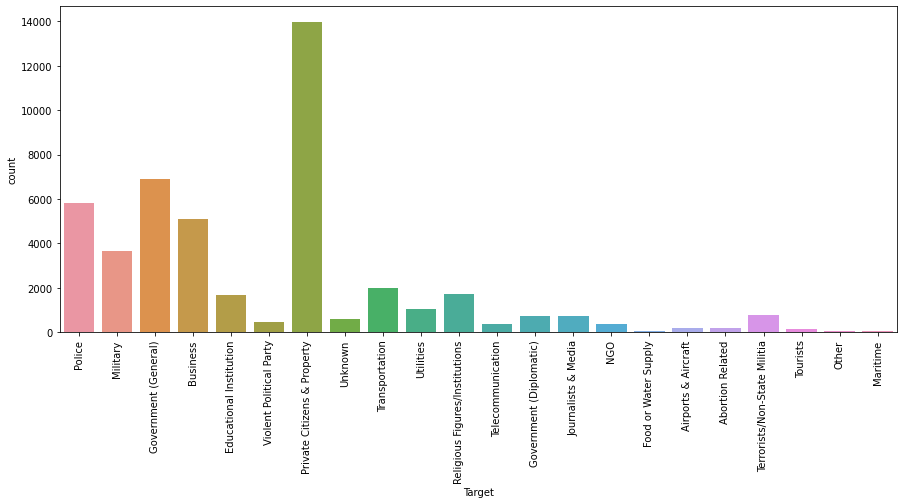

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorist_data['Target'])
plt.xticks(rotation=90)

# From the above chart it is clear that Private citizen and property was mostly targeted.

# **Number of Casualities vs Killed people in different countries with year**

In [ ]:
fig = px.scatter_geo(terrorist_data,terrorist_data.Wound,terrorist_data.Kills,hover_name="Country",locations="Country",locationmode='country names',animation_frame='Year',animation_group='Country', 
                    color='Attack_Type',range_color=[0,1] ,labels={'Kills':'Deaths','Wound':'Casualities'})
fig.show()

# **Total Number of Terrorist attacks in each country**

In [ ]:
terrorism=terrorist_data.groupby(['Country'],as_index=False).count()

In [ ]:
max_count=terrorism['Year'].max()
max_id=terrorism['Year'].idxmax()
max_name=terrorism['Country'][max_id]
min_count=terrorism['Year'].min()
min_id=terrorism['Year'].idxmin()
min_name=terrorism['Country'][min_id]

In [ ]:
print(max_name,'has suffered the maximum number of terrorist attacks of',max_count)
print(min_name,'has suffered the minimum number of terrorist attacks of',min_count)

Iraq has suffered the maximum number of terrorist attacks of 8850
Belize has suffered the minimum number of terrorist attacks of 1


<function matplotlib.pyplot.show>

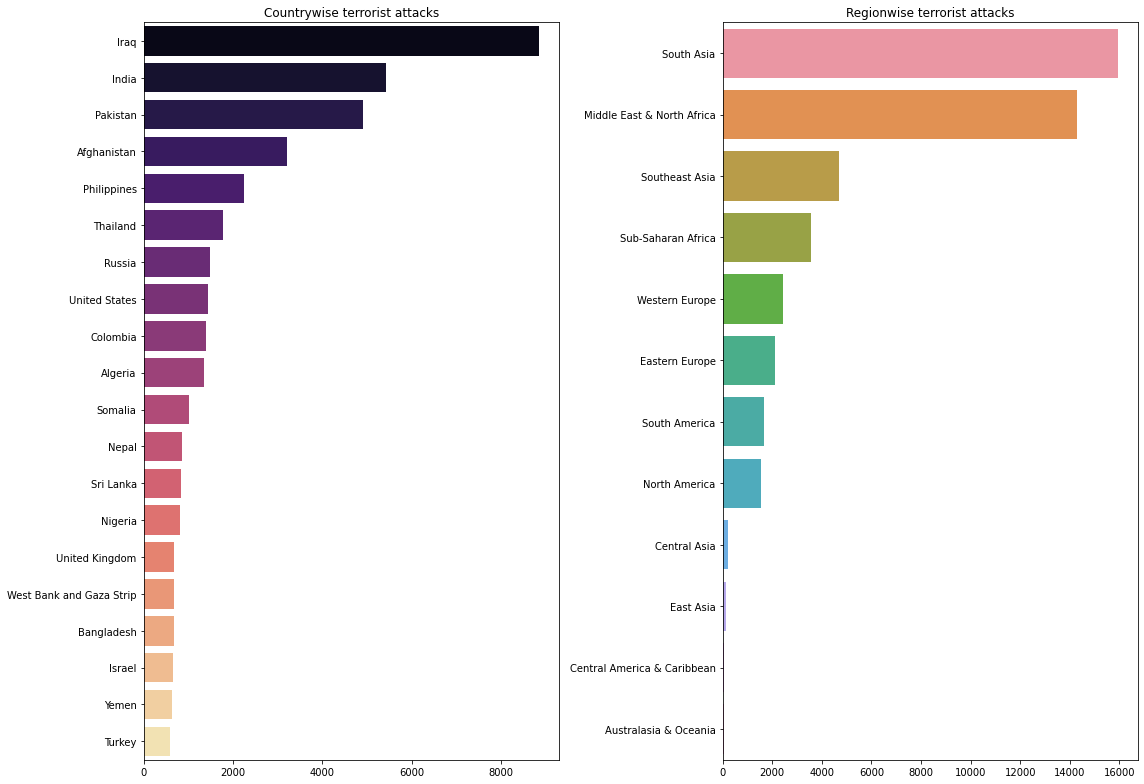

In [ ]:

fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=terrorist_data['Country'].value_counts()[:20].values,y=terrorist_data['Country'].value_counts()[:20].index,
ax=axes[0],palette='magma');
axes[0].set_title('Countrywise terrorist attacks')
sns.barplot(x=terrorist_data['Region'].value_counts().values,y=terrorist_data['Region'].value_counts().index,
ax=axes[1])
axes[1].set_title('Regionwise terrorist attacks')
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show>

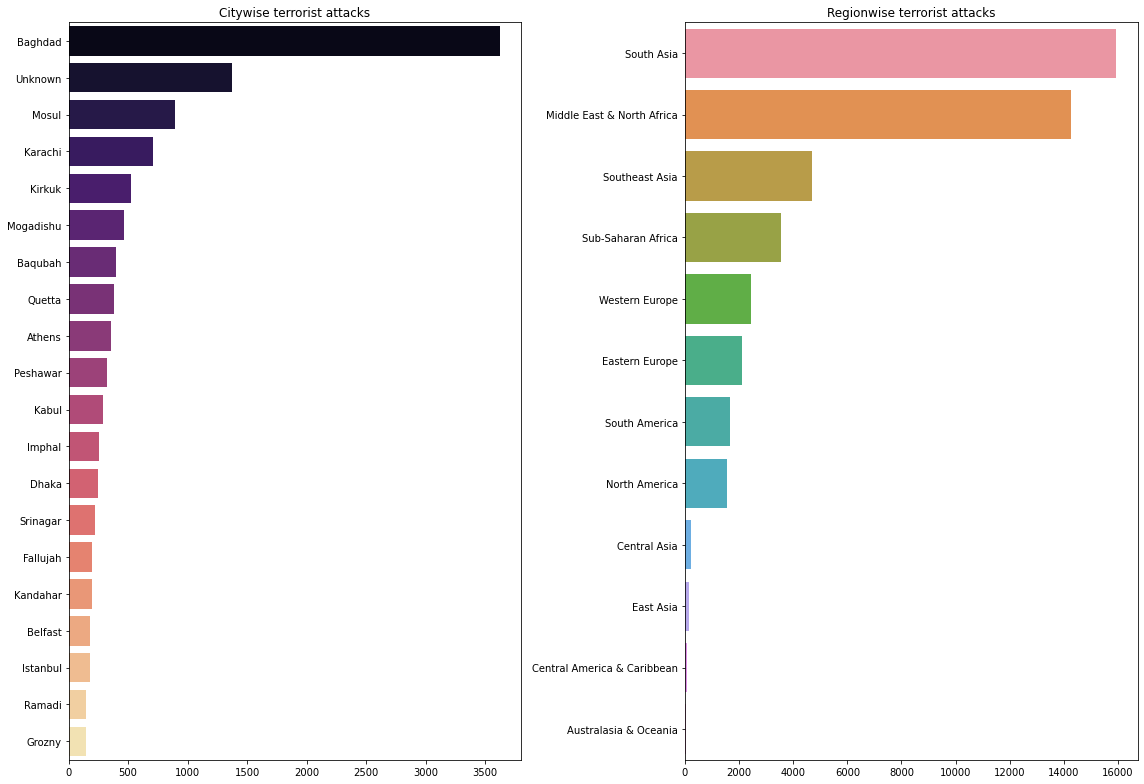

In [ ]:
fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=terrorist_data['City'].value_counts()[:20].values,y=terrorist_data['City'].value_counts()[:20].index,
ax=axes[0],palette='magma');
axes[0].set_title('Citywise terrorist attacks')
sns.barplot(x=terrorist_data['Region'].value_counts().values,y=terrorist_data['Region'].value_counts().index,
ax=axes[1])
axes[1].set_title('Regionwise terrorist attacks')
fig.tight_layout()
plt.show

# From the above chart it is clear that Iraq was most terrorist suffered country while Bagdad was most suffered city.
# From region point of view south asia mostly suffered due to terrorist attacks.

# **Highest number of death casulaties with year**

<function matplotlib.pyplot.show>

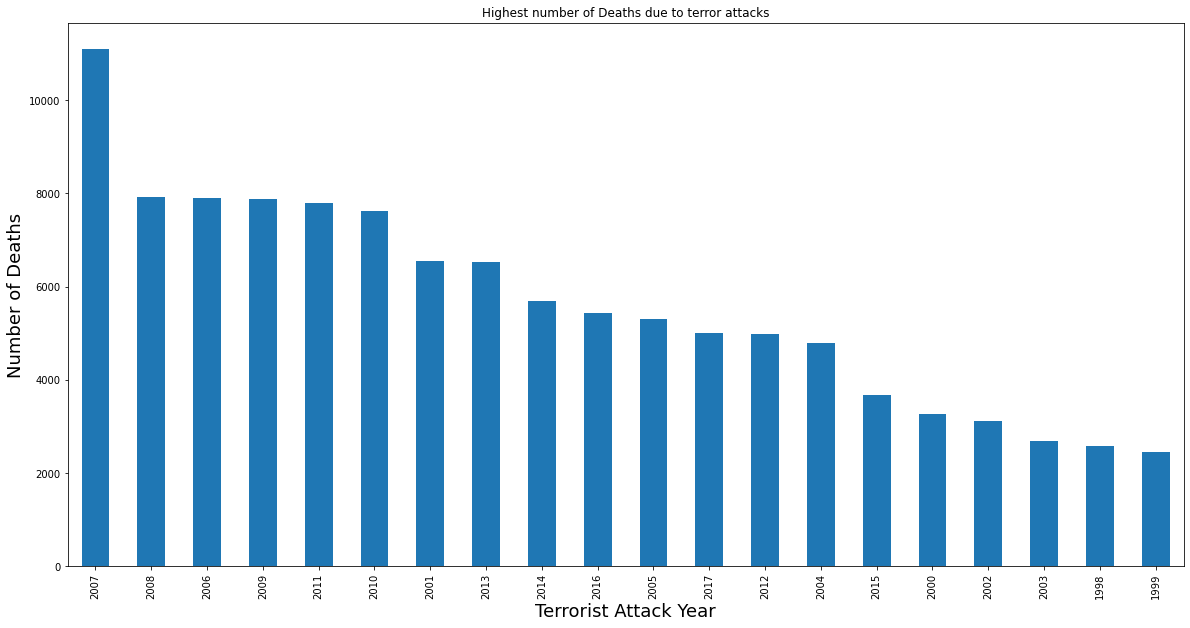

In [ ]:
plt.subplots(figsize=(20,10))
terrorist_data.groupby(['Year'])['Kills'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Highest number of Deaths due to terror attacks')
plt.xlabel('Terrorist Attack Year',fontsize=18)
plt.ylabel('Number of Deaths',fontsize=18)
plt.xticks(rotation=90)
plt.show

# From the above chart it is clear that 2007  most of the death casulties took place due to terrorist attacks.

# **Terrorism Analysis in India**

In [ ]:
group_country=terrorist_data.groupby('Country')
India=group_country.get_group('India')

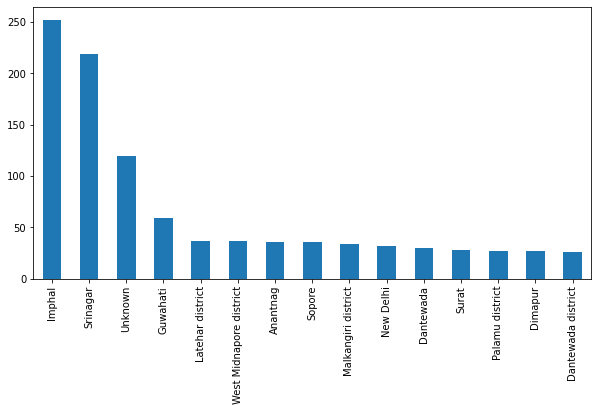

In [ ]:
India['City'].value_counts().nlargest(15).plot(kind='bar',figsize=(10,5))
plt.show()

# From the above chart it is clear that Imphal and Shrinagar was mostly suffered cities due to terrorist attacks.

<function matplotlib.pyplot.show>

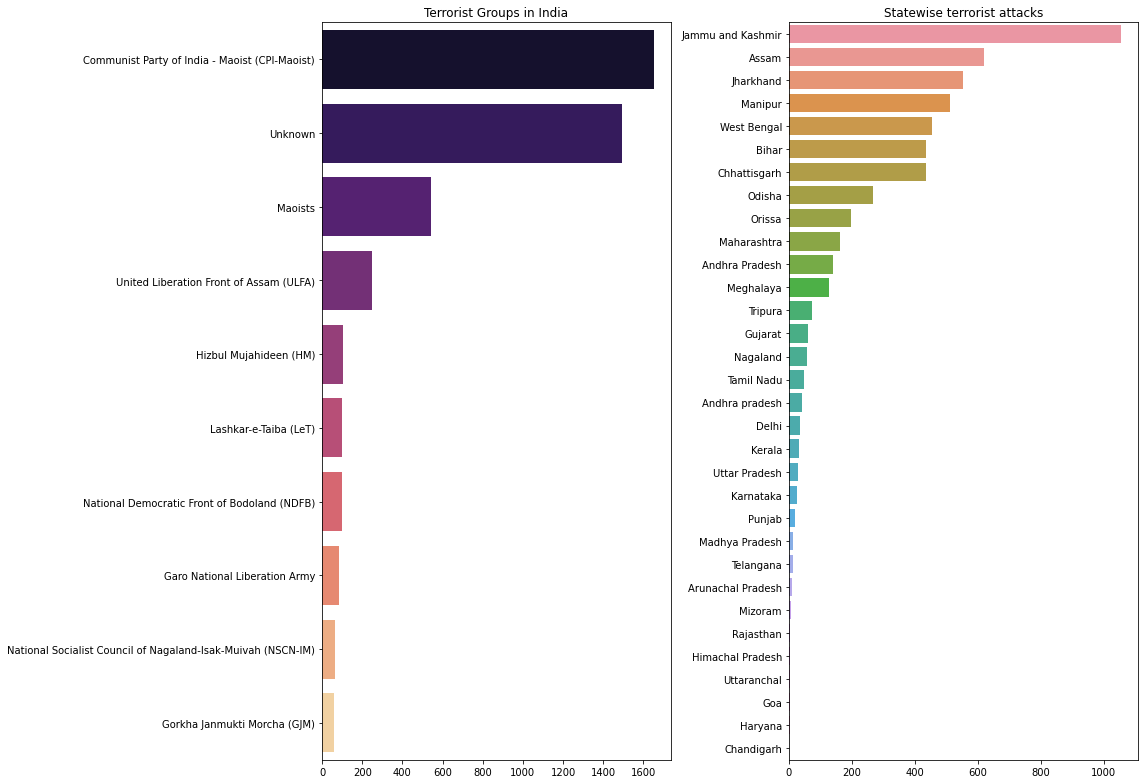

In [ ]:
fig,axes=plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=India['Terrorist_Group'].value_counts()[:10].values,y=India['Terrorist_Group'].value_counts()[:10].index,
ax=axes[0],palette='magma');
axes[0].set_title('Terrorist Groups in India')
sns.barplot(x=India['State'].value_counts().values,y=India['State'].value_counts().index,
ax=axes[1])
axes[1].set_title('Statewise terrorist attacks')
fig.tight_layout()
plt.show

# From the above chart it is clear that Communist Party of India-Moist(CPI-Moist) was biggest terrorist group in India and Jammu & Kashmir most suffered  terrorist state in India. 

# **Most Preferable Attack type in India**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

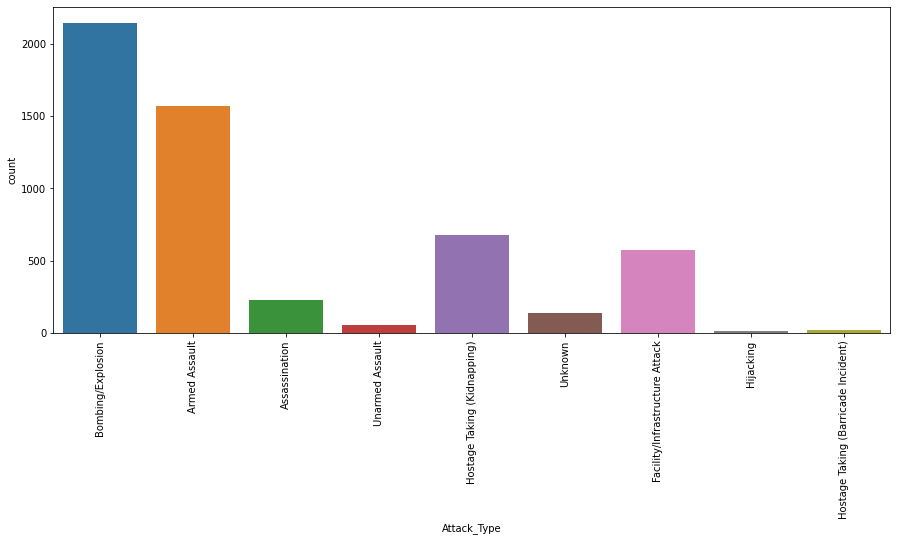

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(India['Attack_Type'])
plt.xticks(rotation=90)
plt.show

# From the above chart it is clear that terrorist  mostly targeted Private citizen and property in India

# Since from the above chart it is clear that Bombing/Explosion method was mostly used in India.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

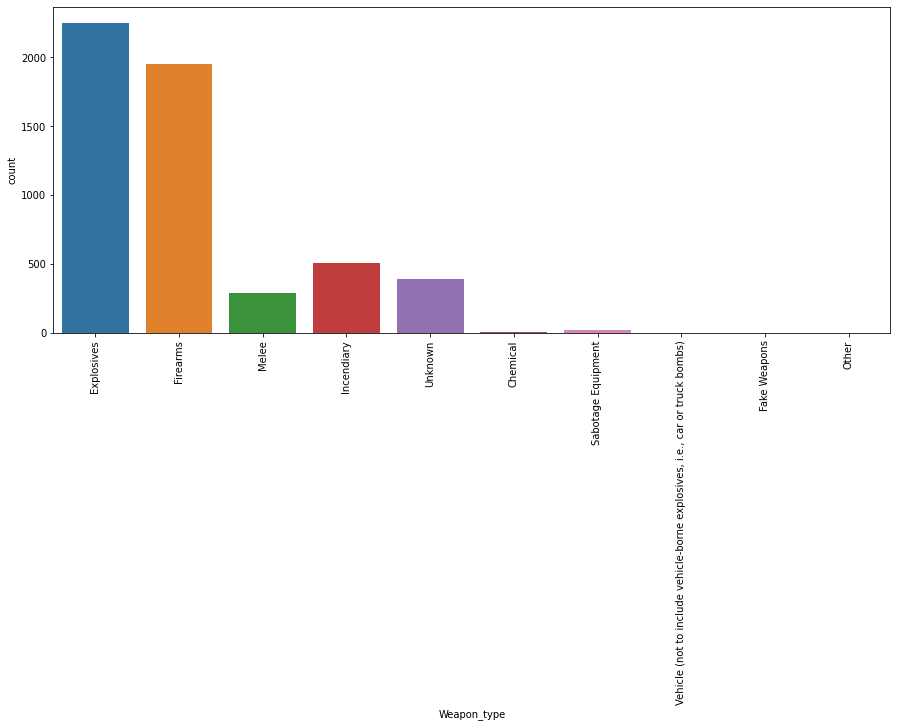

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(India['Weapon_type'])
plt.xticks(rotation=90)
plt.show

# Since from the above chart it is clear that Explosive  was mostly used in India for terrorist attacks.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

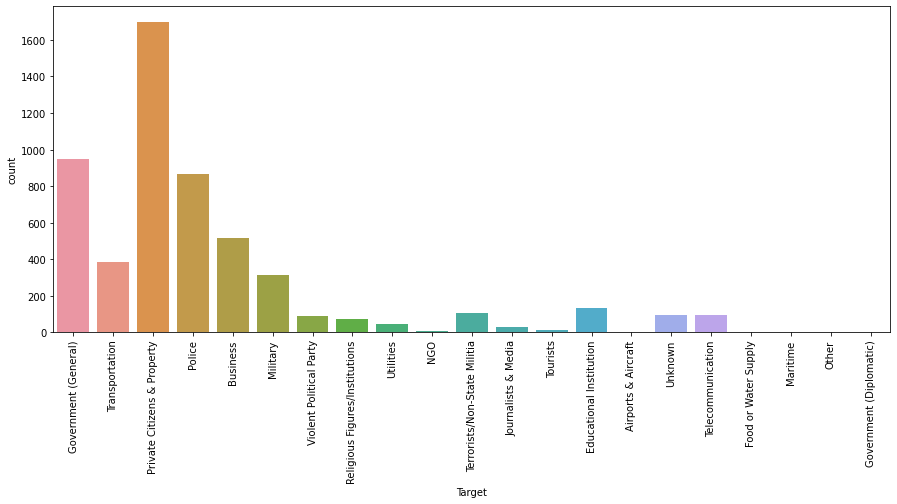

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(India['Target'])
plt.xticks(rotation=90)
plt.show